In [1]:
import string
import numpy as np
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt
import os
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fakru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('english'))
custom_stop_words=['fund', 'funds', 'seek', 'seeks']
stop_words.update(custom_stop_words)

In [4]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [5]:
df = pd.read_csv('fo.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,ISIN/CUSIP,Fund Name,Objective
0,LU1808993080,AB Financial Credit Portfolio A2 USD,Seeks to maximize total returns through curren...
1,LU0689625282,AB FCP I - Short Duration Bond Portfolio,Seeks high total investment return by investin...
2,LU0289939786,AB Eurozone Equity Portfolio,Seeks long-term capital growth by Investing in...
3,LU0539801802,AB European Income Portfolio,Seeks high total return by maximizing current ...
4,LU0128316840,AB European Equity Portfolio,Seeks long-term capital growth by Investing in...


In [7]:
df.describe

<bound method NDFrame.describe of        ISIN/CUSIP                                          Fund Name  \
0    LU1808993080               AB Financial Credit Portfolio A2 USD   
1    LU0689625282           AB FCP I - Short Duration Bond Portfolio   
2    LU0289939786                       AB Eurozone Equity Portfolio   
3    LU0539801802                       AB European Income Portfolio   
4    LU0128316840                       AB European Equity Portfolio   
..            ...                                                ...   
766         LFLAX  Legg Mason BW Global Flexible Income Fund Cl A...   
767         LFLIX  Legg Mason BW Global Flexible Income Fund Cl I...   
768         LFLSX  Legg Mason BW Global Flexible Income Fund Cl I...   
769          JETS                        U.S. Global Jets ETF (JETS)   
770         BNAAX                             UBS Dynamic Alpha Fund   

                                             Objective  
0    Seeks to maximize total returns through

In [9]:
sentences = df['Objective'].values
sentences_original = sentences
sentences

array(['Seeks to maximize total returns through current income and capital appreciation by Investing primarily in the financial credit sector globally including banks, insurance and other finance companies Focusing on subordinated debt securities of the financial credit sector including contingent convertible bonds ( CoCos?) and preferred shares which may be rated Investment Grade or below Investment Grade.',
       'Seeks high total investment return by investing in a global portfolio of short-duration investment grade, fixed-income securities, Hedging non-US dollar-denominated positions to US dollars to minimize the risks of currency fluctuations, Drawing on a large global team to evaluate the top-down factors influencing markets as well as the bottom-up factors affecting bond prices.',
       'Seeks long-term capital growth by Investing in stocks across the Eurozone that offer compelling long-term return potential and attractive valuations, Taking a long-term perspective in order to

In [10]:
total_words = 0

for s in sentences:
    #for w in s:
    total_words += len(s.split())
    #total_words += 1
#print('Total word count of the input data is: ', total_words)
#print('Total word count of the input data is: ', get_total_word_count(get_just_tokens(sentences)))

#tokens = get_just_tokens(sentences)
#print(tokens)

In [11]:
# the input to this function is either a 
# 1. string or 
# 2. list of string or 
# 3. list of list of string

# function returns list of list of words (one list of for each document)
#1. remove punctuation
#2. lower
#3. tokenize sent into word
#4. remove stop


def pre_process_sent(sentences):
    docs=[]
    if isinstance(sentences, str) :
        sentences = [[sentences]]
    #print(sentences)
    for s in sentences:
        #remove punctuation
        s = str(s).translate(str.maketrans('','', string.punctuation))
        #lower
        s = s.lower()
        temp=[]
        #split sentences into words
        for w in word_tokenize(s):
            #remove stops
            if w not in stop_words:
                #w = ps.stem(w)
                #w = lemmatizer.lemmatize(w)
                temp.append(w)
        docs.append(temp)
    return docs

def pre_process_sent_with_stemmer(sentences):
    docs=[]
    if isinstance(sentences, str) :
        sentences = [[sentences]]
    for s in sentences:
        #remove punctuation
        s = str(s).translate(str.maketrans('','', string.punctuation))
        #lower
        s = s.lower()
        temp=[]
        #split sentences into words
        for w in word_tokenize(s):
            #remove stops
            if w not in stop_words:
                w = porter.stem(w)
                #w = lemmatizer.lemmatize(w)
                temp.append(w)
        docs.append(temp)
    return docs

def pre_process_sent_with_lemma(sentences):
    docs=[]
    if isinstance(sentences, str) :
        sentences = [[sentences]]
    for s in sentences:
        #remove punctuation
        s = str(s).translate(str.maketrans('','', string.punctuation))
        #lower
        s = s.lower()
        temp=[]
        #split sentences into words
        for w in word_tokenize(s):
            #remove stops
            if w not in stop_words:
                w = lemmatizer.lemmatize(w)
                temp.append(w)
        docs.append(temp)
    return docs

def get_just_tokens(sentences):
    tokens=[]
    if isinstance(sentences, str) :
        sentences = [sentences]
    for s in sentences:
        #for w in s:
        tokens.append(s.split())
    return tokens

#####  test the above pre-processing functions

In [12]:
# input to this function is list of list of tokens
# for example = ['hello', 'world'] 
# OR  [['hello', 'world']]


def get_vocabulary_for_docs(doc_tokens_cleaned):
    vocab = []
    if isinstance(doc_tokens_cleaned, str) :
        doc_tokens_cleaned = [[doc_tokens_cleaned]]
    for sent_word in doc_tokens_cleaned:
        for w in sent_word:
            vocab.append(w)
    return vocab

def get_total_word_count(sentences_tokens):
    total = 0
    for s in sentences_tokens:
        for w in s:
            total = total + len(w.split())
    return total

In [37]:
def get_min_max_sentence_length(sentences):
    minimum = 9999999
    maximum = 0
    for s in sentences:
        if (len(s) > maximum):
            maximum = len(s)
        if (len(s) < minimum):
            minimum = len(s)
    return (minimum, maximum)     
        

In [13]:
s = 'hello world'
s = pre_process_sent(s)
s=get_vocabulary_for_docs(s)
print('vocab:', s)
print('-------------------')
s = ['hello world']
s = pre_process_sent(s)
s=get_vocabulary_for_docs(s)
print('vocab:', s)
print('-------------------')
s = [['hello world'], ['one two three']]
s = pre_process_sent(s)
s=get_vocabulary_for_docs(s)
print('vocab:', s)
print('-------------------')

vocab: ['hello', 'world']
-------------------
vocab: ['hello', 'world']
-------------------
vocab: ['hello', 'world', 'one', 'two', 'three']
-------------------


#### Test the count functions

In [14]:


s = 'hello world'
print(get_just_tokens(s))

s = ['hello world','one two three']
print(get_just_tokens(s))


[['hello', 'world']]
[['hello', 'world'], ['one', 'two', 'three']]


# Document Statistics

In [38]:
print('Total Documents: ', len(df))
print('Total Word Count: ',get_total_word_count(get_just_tokens(sentences)))
print('Total Word Count after Stops: ', len(get_vocabulary_for_docs(data_cleaned)))
print('Minimum Fund Objective Length: ', get_min_max_sentence_length(sentences_original)[0])
print('Maximum Fund Objective Length: ', get_min_max_sentence_length(sentences_original)[1])

Total Documents:  771
Total Word Count:  31637
Total Word Count after Stops:  17996
Minimum Fund Objective Length:  37
Maximum Fund Objective Length:  679


In [15]:
#remove punctuation
#sentences = [str(s).translate(str.maketrans('','', string.punctuation)) for s in sentences]

In [16]:
# lower case
#sentences = [s.lower() for s in sentences]

In [17]:
# split into words
#sentences_tokens = [word_tokenize(sent) for sent in sentences]

In [18]:
######remove stop words

#data_cleaned = []
#for doc_words in sentences_tokens:
#    temp=[]
#    for w in doc_words:
#        if w not in stop_words:
#            #temp.append(lemmatizer.lemmatize(w))
#            temp.append(w)
            
#    data_cleaned.append(temp)
    

In [19]:
fdist = FreqDist()

In [20]:
data_cleaned = pre_process_sent(sentences)
vocab = get_vocabulary_for_docs(data_cleaned)
f1 = FreqDist(w for w in vocab)

data_cleaned_stemmer = pre_process_sent_with_stemmer(sentences)
vocab_stemmer = get_vocabulary_for_docs(data_cleaned_stemmer)
f1_stemmer = FreqDist(w for w in vocab_stemmer)

data_cleaned_lemma = pre_process_sent_with_lemma(sentences)
vocab_lemma = get_vocabulary_for_docs(data_cleaned_lemma)
f1_lemma = FreqDist(w for w in vocab_lemma)


In [21]:
#vocab = []
#for sent_word in data_cleaned:
#    for w in sent_word:
#        vocab.append(w)
#fdist = FreqDist([w for w in vocab])

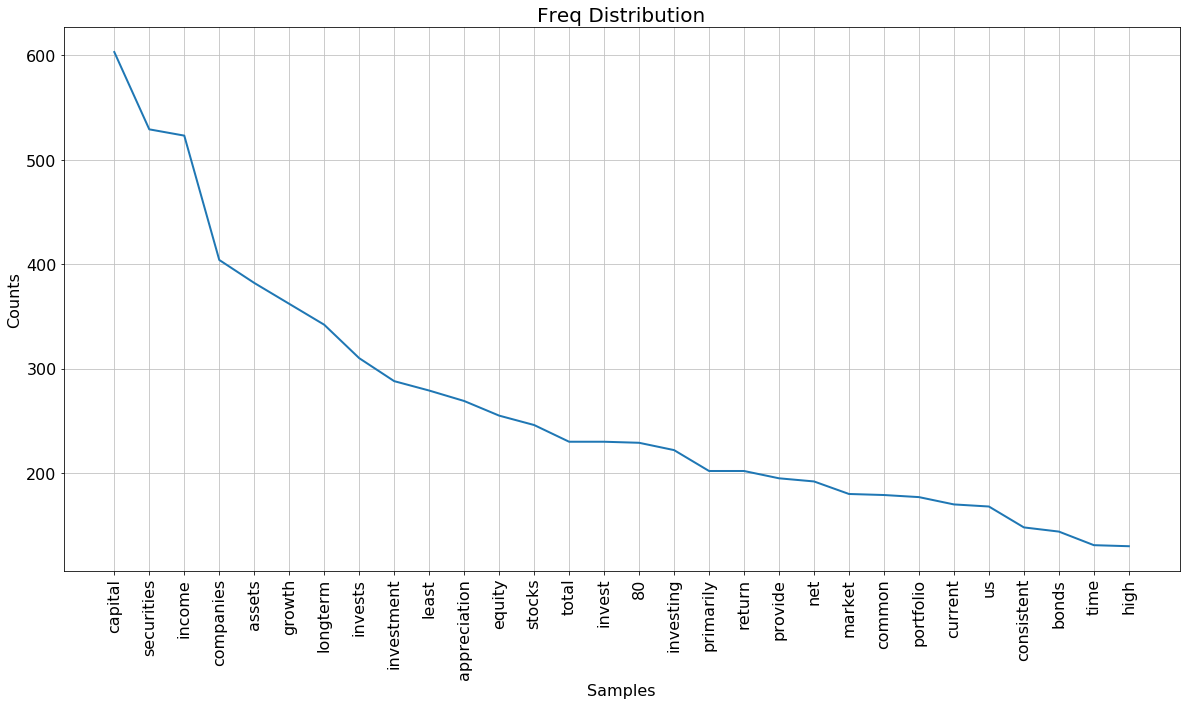

In [23]:
plt.figure(figsize=(20,10))
plt.title('Freq Distribution', fontsize=20)
plt.xlabel('xlabel', fontsize=16)
plt.ylabel('ylabel', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=10)
f1.plot(30)

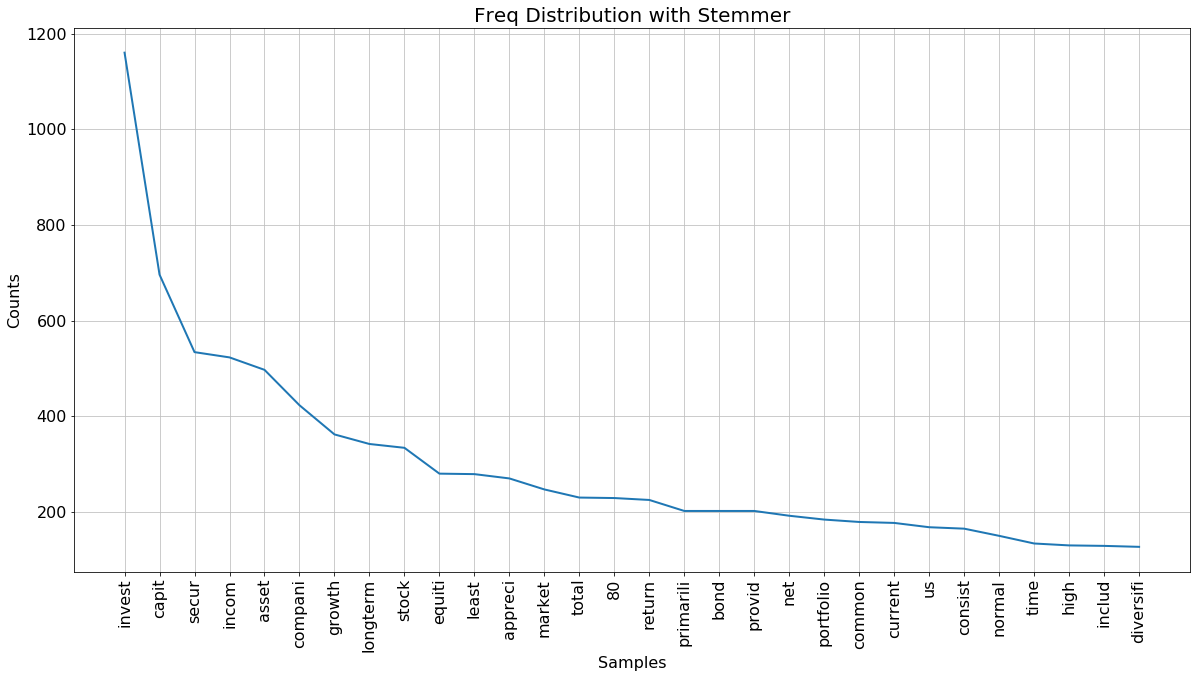

In [24]:
plt.figure(figsize=(20,10))
plt.title('Freq Distribution with Stemmer', fontsize=20)
plt.xlabel('xlabel', fontsize=16)
plt.ylabel('ylabel', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=10)
f1_stemmer.plot(30)

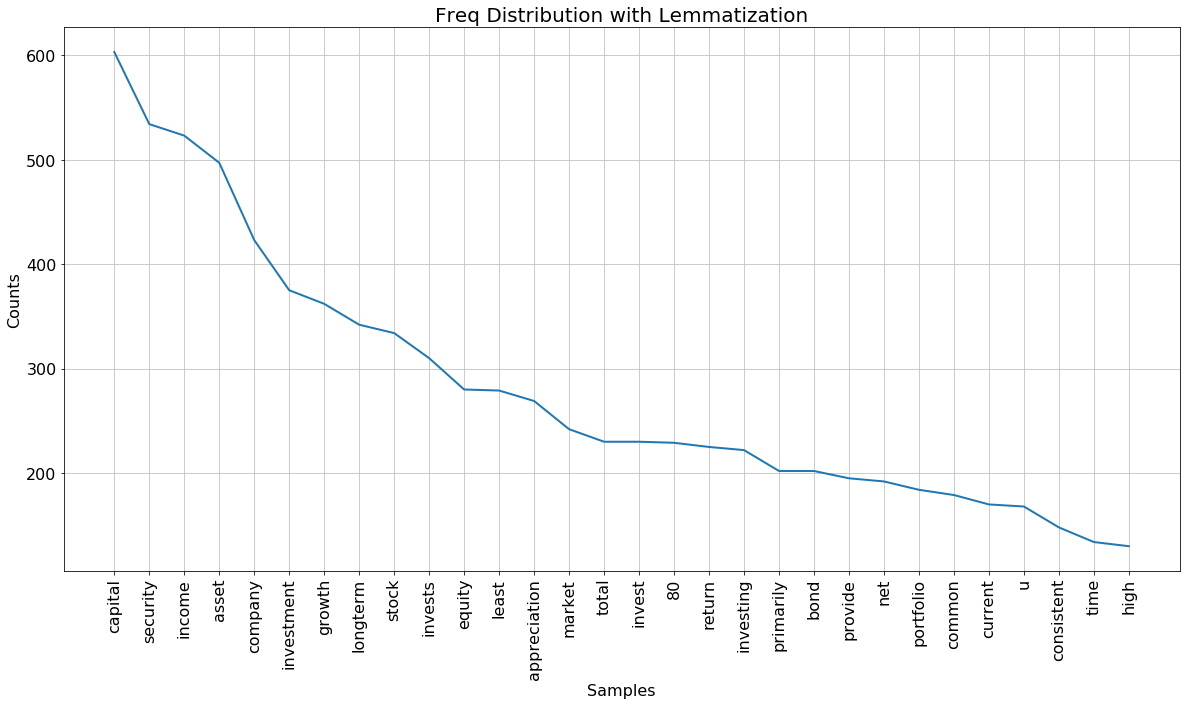

In [25]:
plt.figure(figsize=(20,10))
plt.title('Freq Distribution with Lemmatization', fontsize=20)
plt.xlabel('xlabel', fontsize=16)
plt.ylabel('ylabel', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=10)
f1_lemma.plot(30)

In [25]:
pre_process_sent(['i want to invest in funds with capital appreciation long-term tax benefits'])

[['want', 'invest', 'capital', 'appreciation', 'longterm', 'tax', 'benefits']]

In [26]:
pre_process_sent_with_stemmer(['i want to invest in funds with capital appreciation long-term tax benefits'])

[['want', 'invest', 'capit', 'appreci', 'longterm', 'tax', 'benefit']]

In [27]:
pre_process_sent_with_lemma(['i want to invest in funds with capital appreciation long term tax benefits'])

[['want',
  'invest',
  'capital',
  'appreciation',
  'long',
  'term',
  'tax',
  'benefit']]

In [28]:
print(vocab)


['maximize', 'total', 'returns', 'current', 'income', 'capital', 'appreciation', 'investing', 'primarily', 'financial', 'credit', 'sector', 'globally', 'including', 'banks', 'insurance', 'finance', 'companies', 'focusing', 'subordinated', 'debt', 'securities', 'financial', 'credit', 'sector', 'including', 'contingent', 'convertible', 'bonds', 'cocos', 'preferred', 'shares', 'may', 'rated', 'investment', 'grade', 'investment', 'grade', 'high', 'total', 'investment', 'return', 'investing', 'global', 'portfolio', 'shortduration', 'investment', 'grade', 'fixedincome', 'securities', 'hedging', 'nonus', 'dollardenominated', 'positions', 'us', 'dollars', 'minimize', 'risks', 'currency', 'fluctuations', 'drawing', 'large', 'global', 'team', 'evaluate', 'topdown', 'factors', 'influencing', 'markets', 'well', 'bottomup', 'factors', 'affecting', 'bond', 'prices', 'longterm', 'capital', 'growth', 'investing', 'stocks', 'across', 'eurozone', 'offer', 'compelling', 'longterm', 'return', 'potential',

In [29]:
print(vocab_lemma)

['maximize', 'total', 'return', 'current', 'income', 'capital', 'appreciation', 'investing', 'primarily', 'financial', 'credit', 'sector', 'globally', 'including', 'bank', 'insurance', 'finance', 'company', 'focusing', 'subordinated', 'debt', 'security', 'financial', 'credit', 'sector', 'including', 'contingent', 'convertible', 'bond', 'coco', 'preferred', 'share', 'may', 'rated', 'investment', 'grade', 'investment', 'grade', 'high', 'total', 'investment', 'return', 'investing', 'global', 'portfolio', 'shortduration', 'investment', 'grade', 'fixedincome', 'security', 'hedging', 'nonus', 'dollardenominated', 'position', 'u', 'dollar', 'minimize', 'risk', 'currency', 'fluctuation', 'drawing', 'large', 'global', 'team', 'evaluate', 'topdown', 'factor', 'influencing', 'market', 'well', 'bottomup', 'factor', 'affecting', 'bond', 'price', 'longterm', 'capital', 'growth', 'investing', 'stock', 'across', 'eurozone', 'offer', 'compelling', 'longterm', 'return', 'potential', 'attractive', 'valua

In [30]:
print(vocab_stemmer)

['maxim', 'total', 'return', 'current', 'incom', 'capit', 'appreci', 'invest', 'primarili', 'financi', 'credit', 'sector', 'global', 'includ', 'bank', 'insur', 'financ', 'compani', 'focus', 'subordin', 'debt', 'secur', 'financi', 'credit', 'sector', 'includ', 'conting', 'convert', 'bond', 'coco', 'prefer', 'share', 'may', 'rate', 'invest', 'grade', 'invest', 'grade', 'high', 'total', 'invest', 'return', 'invest', 'global', 'portfolio', 'shortdur', 'invest', 'grade', 'fixedincom', 'secur', 'hedg', 'nonu', 'dollardenomin', 'posit', 'us', 'dollar', 'minim', 'risk', 'currenc', 'fluctuat', 'draw', 'larg', 'global', 'team', 'evalu', 'topdown', 'factor', 'influenc', 'market', 'well', 'bottomup', 'factor', 'affect', 'bond', 'price', 'longterm', 'capit', 'growth', 'invest', 'stock', 'across', 'eurozon', 'offer', 'compel', 'longterm', 'return', 'potenti', 'attract', 'valuat', 'take', 'longterm', 'perspect', 'order', 'capit', 'shortterm', 'market', 'ineffici', 'creat', 'investor', 'overreact', 'm

## Visualizations

### WordCloud

In [31]:
from wordcloud import WordCloud

In [105]:
def heatmap2d(arr: np.ndarray, title, filename):
    plt.figure(figsize=(20,10))
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.savefig(filename)
    plt.show()


In [32]:
wc = WordCloud(width=1000, height=600).generate(' '.join(vocab))

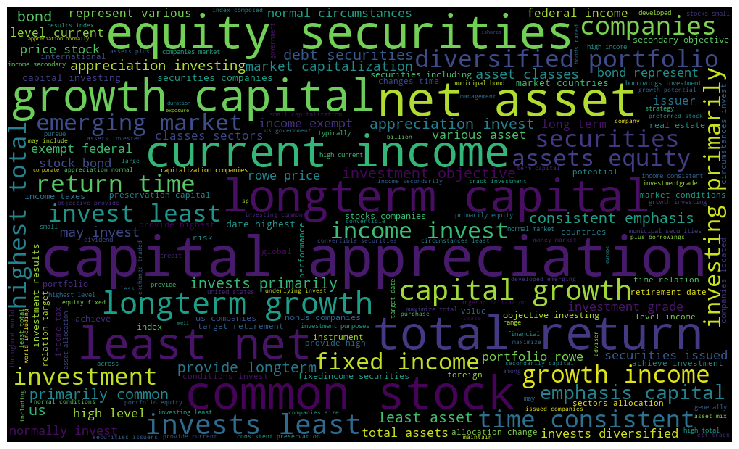

In [33]:
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.savefig('wc2.png')
plt.show()

### CountVectorizer

In [108]:
import csv
import nltk
import sklearn
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from pylab import *
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import time

(771, 1456)
10 100 1000 130 15 1940 1970s 20 2000 2005


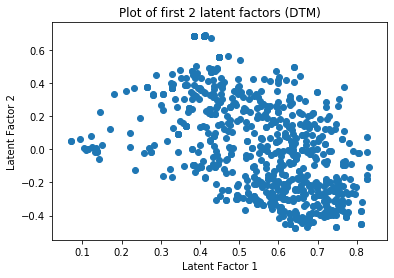

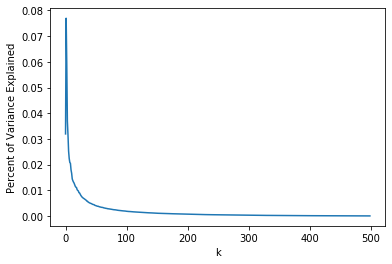

Duration:  1.843059778213501


In [133]:
start = time.time()
numResp = len(data_cleaned)
cleanText = []
for i in range(0, numResp):
    #cleanText.append(pre_process(vocab[i]))
    cleanText.append(' '.join(data_cleaned[i]))

vectorizer = CountVectorizer(min_df=1)
dtm = vectorizer.fit_transform(cleanText)

print(dtm.shape)
df = pd.DataFrame(dtm.toarray(), columns =vectorizer.get_feature_names())
terms = vectorizer.get_feature_names()
print(" ".join(terms[0:10]))

lsa = TruncatedSVD(25, algorithm='randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
###########plot size ##############
#plt.figure(figsize=(20,10))
#fig = plt.figure(figsize=(18, 18))
################
plt.figure(0)
plt.scatter(xs,ys)
plt.xlabel('Latent Factor 1')
plt.ylabel('Latent Factor 2')
plt.title('Plot of first 2 latent factors (DTM)')
plt.savefig('DTM_latent_factors.png')
plt.show()


# Now let's do SVD (Singular Value Decomposition)
svd = TruncatedSVD(500, algorithm='randomized')
svd.fit(dtm)

# Set up a variance plot
VarianceExplained=svd.explained_variance_ratio_
plt.plot(VarianceExplained)
plt.xlabel("k")
plt.ylabel("Percent of Variance Explained")
title=("Scree Plot for up to 500 latent factors")
plt.savefig('DTM_screen.png')
plt.show()

# Now, let's look at the top terms

#sing_vecs=lsa.components_[0]
#index = np.argsort(sing_vecs).tolist()
#index.reverse()
## Get our top 10 terms
#terms=[vectorizer.get_feature_names()[weightIndex] for weightIndex in index[0:10]]
#weights=[sing_vecs[weightIndex] for weightIndex in index[0:10]]
#terms.reverse()
#weights.reverse()

#plt.barh(terms, weights, align="center")
# Note here: we can't change the plot labels (xlabel, ylabel, title) because pyplot 
# will throw an error. If you want to go crazy with subplots in order to get by this
# problem, go for it but it's not necessary.
#plt.savefig('DTM_terms.png')
#plt.show()

end = time.time()
print('Duration: ', (end-start))

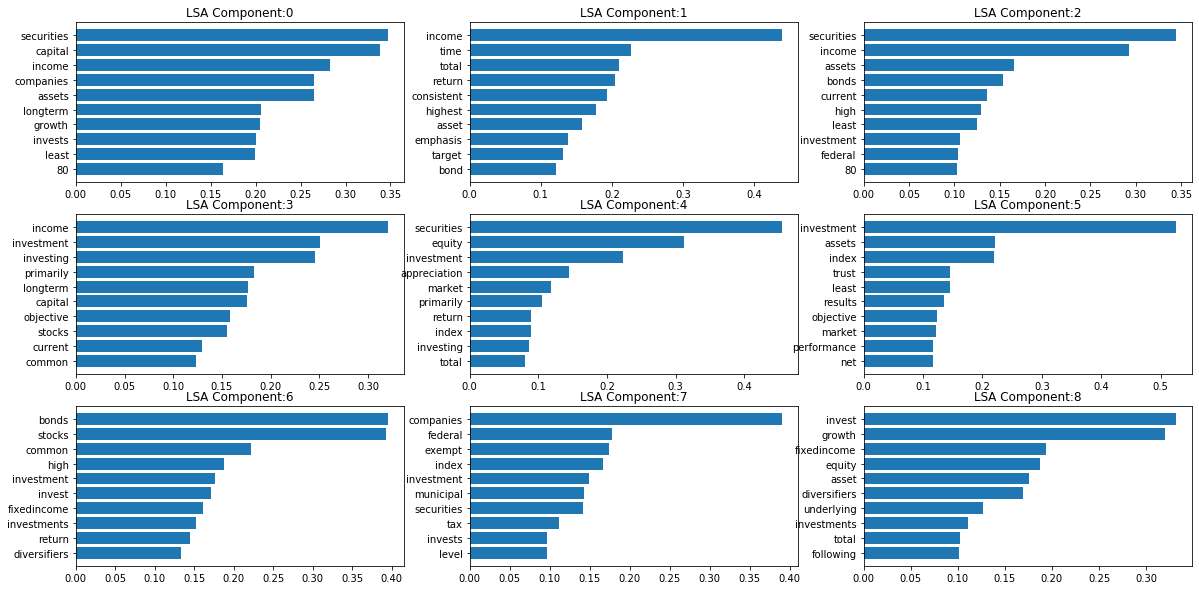

In [134]:
fig = plt.figure(figsize=(20,10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    sing_vecs=lsa.components_[i-1]
    index = np.argsort(sing_vecs).tolist()
    index.reverse()
    # Get our top 10 terms
    terms=[vectorizer.get_feature_names()[weightIndex] for weightIndex in index[0:10]]
    weights=[sing_vecs[weightIndex] for weightIndex in index[0:10]]
    terms.reverse()
    weights.reverse()
    plt.title('LSA Component:' + str(i-1))
    plt.barh(terms, weights, align="center")
plt.savefig('DTM_weights.png.png')
plt.show()

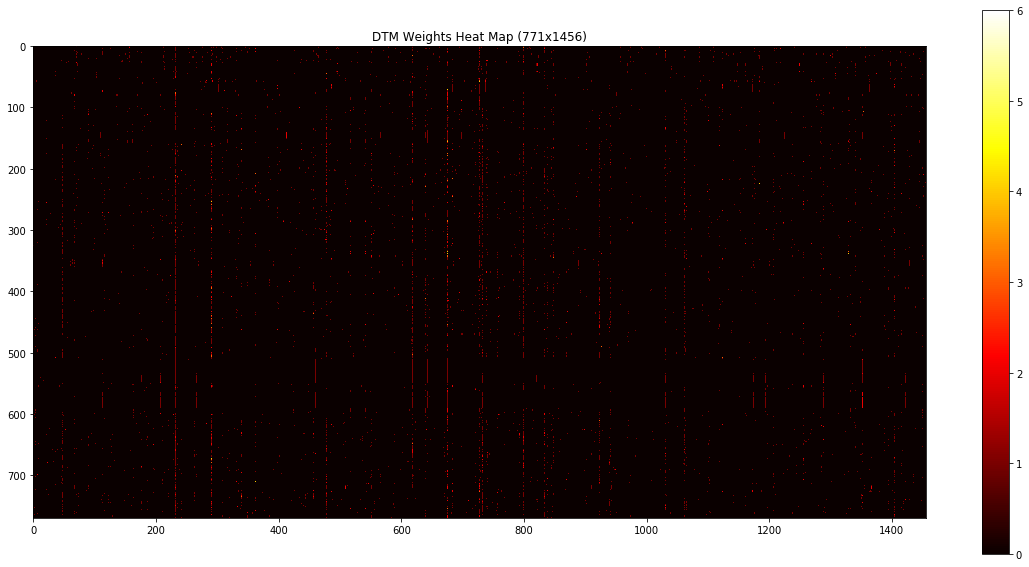

In [135]:
heatmap2d(dtm.toarray(),'DTM Weights Heat Map (771x1456)', 'dtm_heatmap.png')

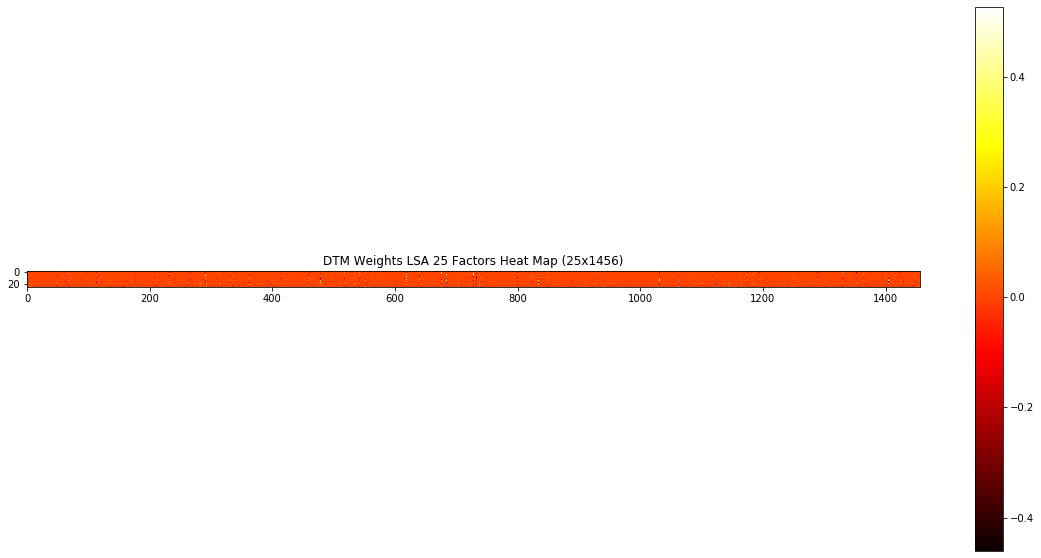

In [136]:
heatmap2d(lsa.components_,'DTM Weights LSA 25 Factors Heat Map (25x1456)', 'dtm_heatmap_LSA.png')

(771, 1456)
10 100 1000 130 15 1940 1970s 20 2000 2005


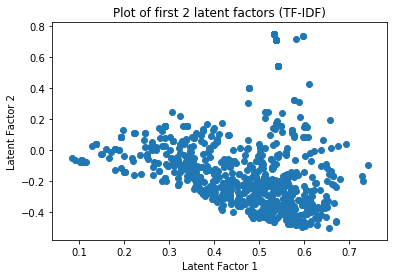

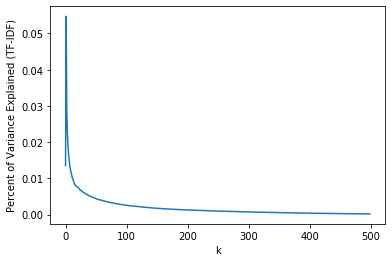

Duration:  1.8121464252471924


In [137]:
start = time.time()

numResp = len(data_cleaned)
cleanText = []
for i in range(0, numResp):
    cleanText.append(' '.join(data_cleaned[i]))
#    cleanText.append(pre_process(vocab[i]))

#vectorizer = CountVectorizer(min_df=1)
#dtm = vectorizer.fit_transform(cleanText)

#tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
#tfidf_transformer.fit(tfidf_transformer)

tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(cleanText)

vectorizer=tfidf_vectorizer
dtm = tfidf_vectorizer_vectors

print(dtm.shape)

terms = vectorizer.get_feature_names()
print(" ".join(terms[0:10]))

lsa = TruncatedSVD(25, algorithm='randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]

#fig = plt.figure(figsize=(20,10))


#plt.subplot(2,1,1)
plt.scatter(xs,ys)
plt.xlabel('Latent Factor 1')
plt.ylabel('Latent Factor 2')
plt.title('Plot of first 2 latent factors (TF-IDF)')
plt.savefig('tfIdf_latent_factors.png')
plt.show()


# Now let's do SVD (Singular Value Decomposition)
svd = TruncatedSVD(500, algorithm='randomized')
svd.fit(dtm)

# Set up a variance plot
VarianceExplained=svd.explained_variance_ratio_
plt.plot(VarianceExplained)
plt.xlabel("k")
plt.ylabel("Percent of Variance Explained (TF-IDF)")
title=("Scree Plot for up to 500 latent factors")
plt.savefig('tfIdf_screen.png')
plt.show()


# Now, let's look at the top terms
#-----------------
#sing_vecs=lsa.components_[0]
#index = np.argsort(sing_vecs).tolist()
#index.reverse()
## Get our top 10 terms
#terms=[vectorizer.get_feature_names()[weightIndex] for weightIndex in index[0:10]]
#weights=[sing_vecs[weightIndex] for weightIndex in index[0:10]]
#terms.reverse()
#weights.reverse()

#plt.barh(terms, weights, align="center")

#-----------------


#-------------------------
# Note here: we can't change the plot labels (xlabel, ylabel, title) because pyplot 
# will throw an error. If you want to go crazy with subplots in order to get by this
# problem, go for it but it's not necessary.
#plt.savefig('tfIdf_terms.png')
#plt.show()
end = time.time()
print('Duration: ', (end-start))

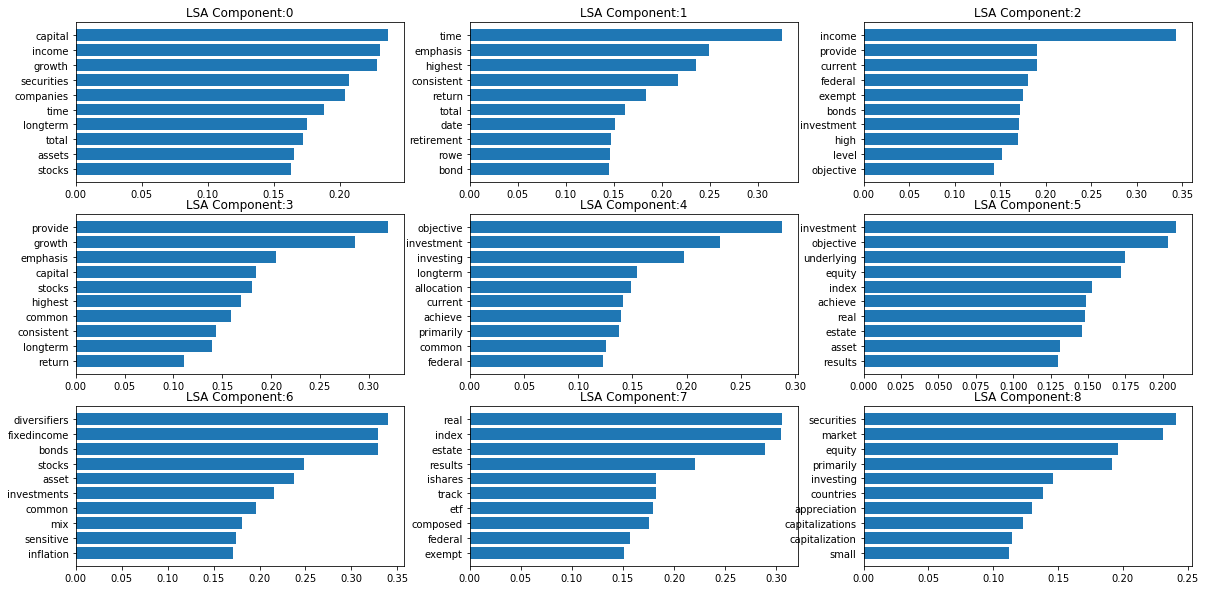

In [138]:
fig = plt.figure(figsize=(20,10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    sing_vecs=lsa.components_[i-1]
    index = np.argsort(sing_vecs).tolist()
    index.reverse()
    # Get our top 10 terms
    terms=[vectorizer.get_feature_names()[weightIndex] for weightIndex in index[0:10]]
    weights=[sing_vecs[weightIndex] for weightIndex in index[0:10]]
    terms.reverse()
    weights.reverse()
    plt.title('LSA Component:' + str(i-1))
    plt.barh(terms, weights, align="center")
plt.savefig('tfIdf_weights.png')

In [139]:
tfidf_vectorizer_vectors.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
#vectorizer=tfidf_vectorizer
#dtm = tfidf_vectorizer_vectors
lsa

TruncatedSVD(algorithm='randomized', n_components=25, n_iter=5,
             random_state=None, tol=0.0)

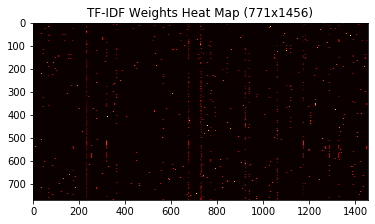

In [141]:
plt.title('TF-IDF Weights Heat Map (771x1456)')
plt.imshow(tfidf_vectorizer_vectors.toarray(), cmap='hot', interpolation='nearest')
plt.show()

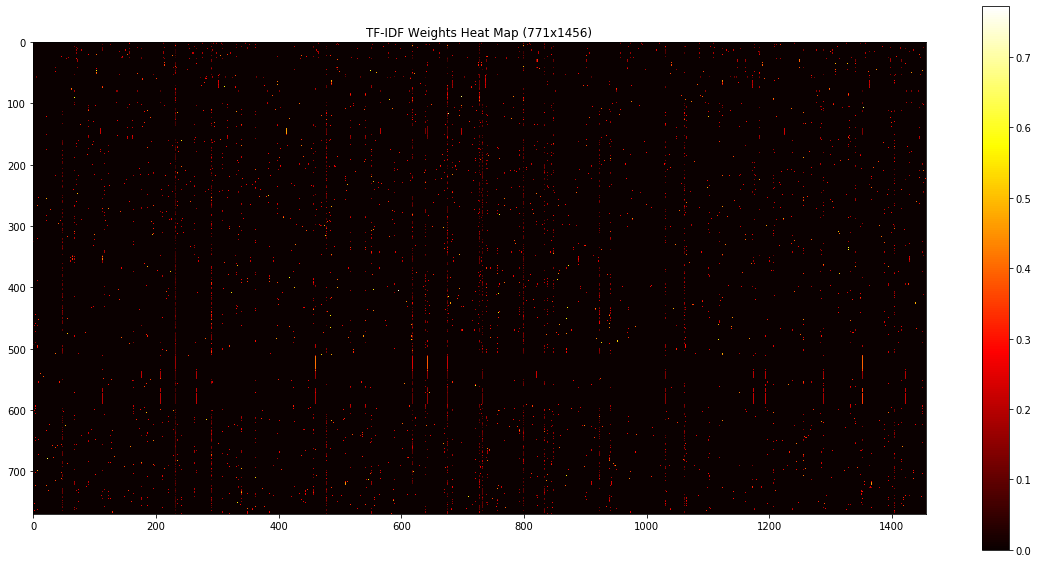

In [142]:
def heatmap2d(arr: np.ndarray, title, filename):
    plt.figure(figsize=(20,10))
    plt.imshow(arr, cmap='hot')
    plt.colorbar()
    plt.title(title)
    plt.savefig(filename)
    plt.show()


test_array = np.arange(100 * 100).reshape(100, 100)
heatmap2d(tfidf_vectorizer_vectors.toarray(),'TF-IDF Weights Heat Map (771x1456)', 'tfidf_heatmap.png')

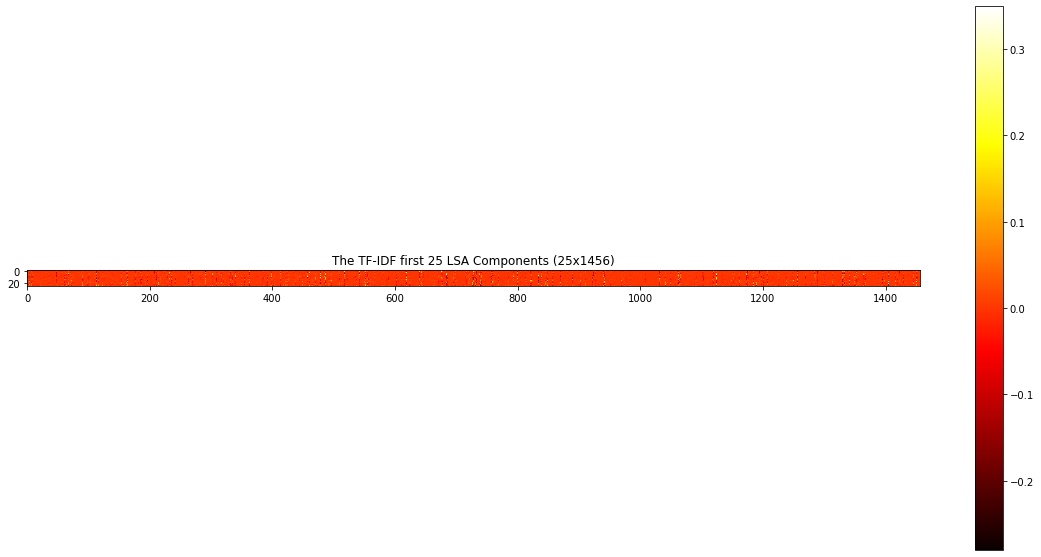

In [143]:
#a = np.random.random((16, 16))
#plt.figure(figsize=(10,6))
#plt.imshow(lsa.components_, cmap='hot', interpolation='nearest')
#plt.title('The TF-IDF first 25 LSA Components')
#plt.show()
#lsa.components_
heatmap2d(lsa.components_,'The TF-IDF first 25 LSA Components (25x1456)', 'tfidf_heatmap_LSA.png')



In [146]:
print(f1.hapaxes())

['banks', 'insurance', 'subordinated', 'contingent', 'cocos', 'shortduration', 'minimize', 'drawing', 'evaluate', 'topdown', 'influencing', 'prices', 'eurozone', 'achieving', 'noneuropean', 'currencydenominated', 'higheryielding', 'yielding', 'euros', 'overweight', 'segments', 'currencyoriented', 'decisions', 'framework', 'subsector', 'emergingmarkets', 'thesum', 'hard', 'quasisovereign', 'teams', 'emergingmarket', 'hardcurrency', 'localcurrency', 'extensive', 'experience', 'emdebt', 'capabilities', 'traders', 'build', 'riskreturn', 'profile', 'commodityrelated', 'determining', 'attractiveness', 'outlook', 'adjusted', 'usddenominated', 'governmental', 'knowledge', 'abs', 'insights', 'firms', 'organization', 'dampen', 'interestrate', 'alleviate', 'stressed', 'avoiding', 'cccrated', 'generation', 'nontraditional', 'experts', 'ab', 'manger', 'iboxx', 'capitalisation', 'bilion', 'mandates', 'cooperative', 'participation', 'certificates', 'exercise', 'activity', 'direct', 'provided', 'euros

In [147]:
len(f1.hapaxes())

550

In [148]:
from nltk.text import Text

In [168]:
all_sent = [s for s in sentences_original]


In [169]:
text = Text(all_sent)

In [176]:
text.collocation_list()

['The Fund seeks the highest total return over time consistent with an emphasis on both capital growth and income. The Fund invests in a diversified portfolio of other T. Rowe Price stock and bond funds that represent various asset classes and sectors. Allocation changes over time in relation to its target retirement date. The Fund seeks the highest total return over time consistent with an emphasis on both capital growth and income. The Fund invests in a diversified portfolio of other T. Rowe Price stock and bond funds that represent various asset classes and sectors. Allocation changes over time in relation to its target retirement date.',
 'The Fund seeks to provide the highest total return over time consistent with an emphasis on both capital growth and income. The Fund seeks to provide the highest total return over time consistent with an emphasis on both capital growth and income.',
 'The Fund seeks highest total return over time consistent with its asset mix. The Fund will alloc

In [174]:
text.findall('grade')

rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad;
rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad;
rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad;
rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad;
rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad; rad;
rad; rad


In [178]:
sentences_original[0].

'Seeks to maximize total returns through current income and capital appreciation by Investing primarily in the financial credit sector globally including banks, insurance and other finance companies Focusing on subordinated debt securities of the financial credit sector including contingent convertible bonds ( CoCos?) and preferred shares which may be rated Investment Grade or below Investment Grade.'

In [179]:
v='hello'

In [180]:
v.by

AttributeError: 'str' object has no attribute 'decode'

In [191]:
a = int(30)

In [192]:
b=float(11.7)


In [193]:
c = str('hello')

In [194]:
flag = bool(True)

In [200]:
e = chr(46)

In [201]:
e

'.'

In [203]:
l = list([10,34,16,17])

In [204]:
l

[10, 34, 16, 17]

In [205]:
if a == 30:
    print('True')
else:
    print('False')

True


In [206]:
n = int(5)
sum= int(0)
for i in range(0,5):
    sum = sum + i

print(sum)

10


In [207]:
n = int(0)
sum = int(0)
while(n<5):
    sum = sum + n
    n = n+1
print(sum)

10


In [208]:
a=int(10)
b = int(7)
c = int(11)
if a>b:
    if a>c:
        print('A is largest: ', a)
    else:
        if b>c:
            print('B is largest: ', b)
        else:
            print('C is largest: ', c)

C is largest:  11


In [211]:
a = int(input('Enter the int number'))

Enter the int number11


In [212]:
a=6
if 6%2 == 0 :
    print('even')
else:
    print('odd')

even
